1) Сравните и сделайте выводы о методах бинаризации на конкретных примерах.
2) Примените морфологические операции к бинарным изображениям.
3) Найдите цифровое изображение, которое содержит текст. Считайте это изображение при помощи OpenCV и выполните бинаризацию. Примените операцию дилатации с различным размером структурного элемента и различной формы. Сделайте вывод о влиянии размера и формы структурного элемента на получаемый результат. 


In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import cv2 as cv

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

In [2]:
image_path = 'img.png'

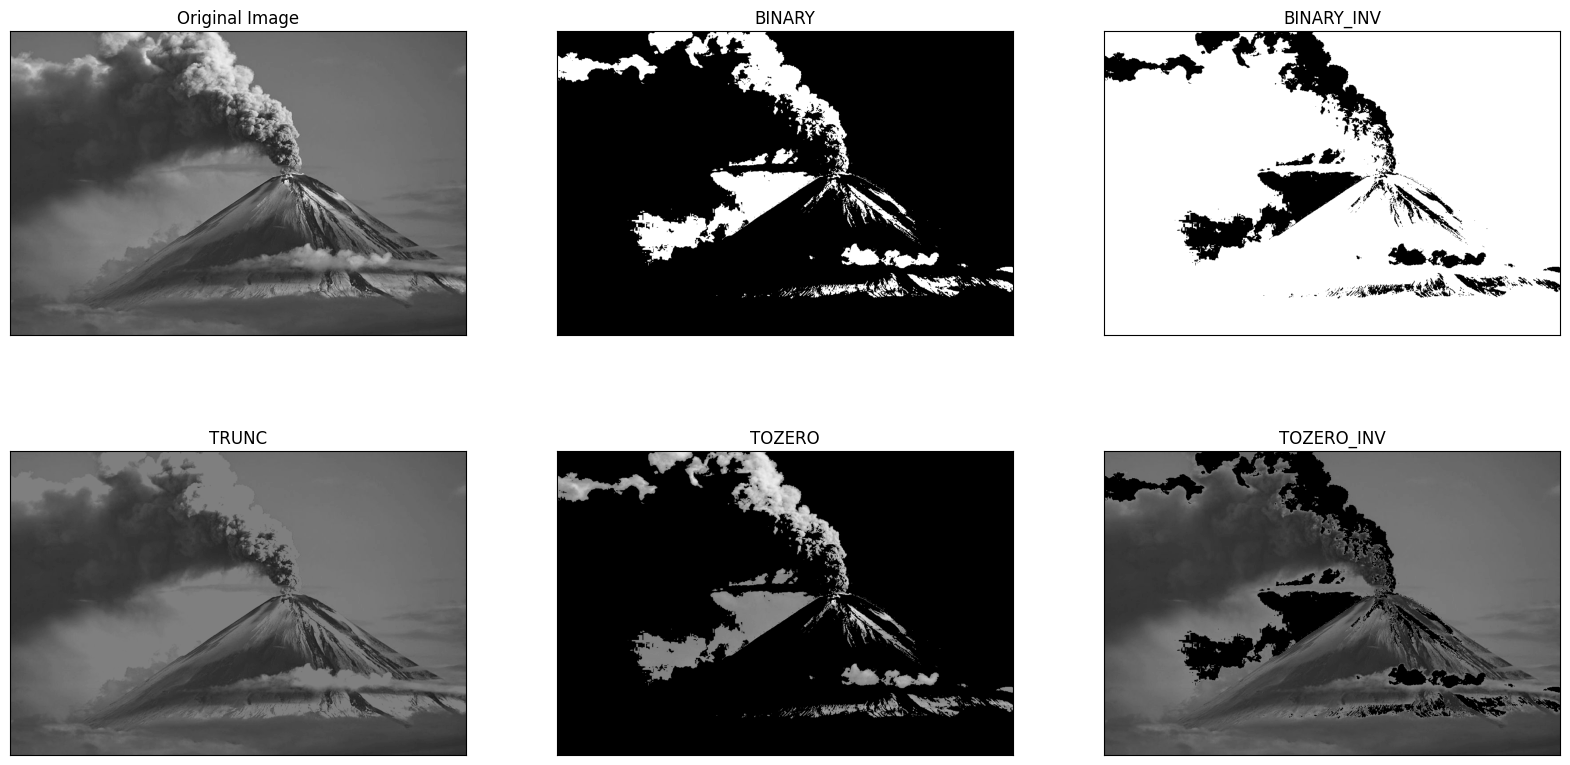

In [3]:
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

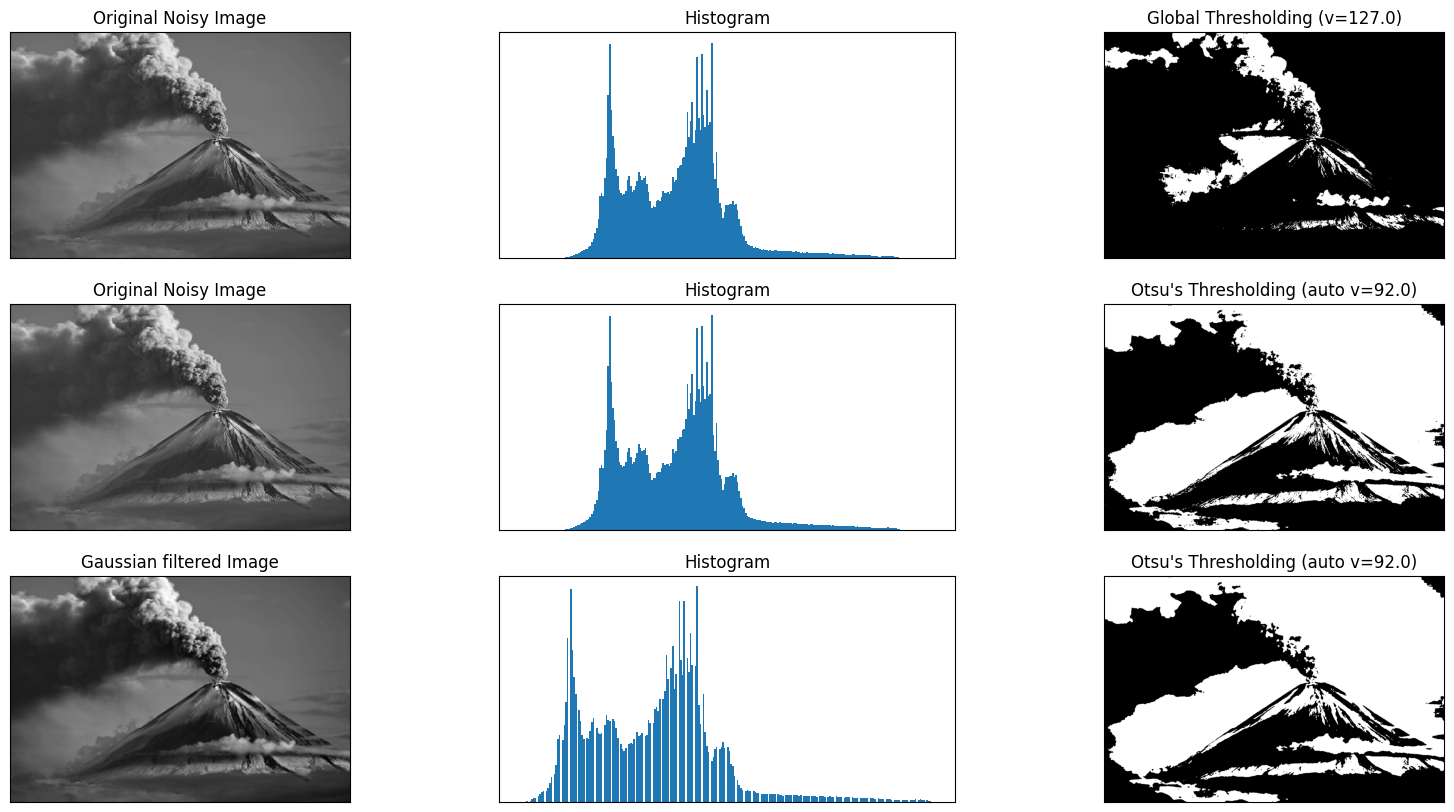

In [22]:
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# global thresholding
ret1, th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2, th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
plt.figure(figsize=(20,10))
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram',f'Global Thresholding (v={ret1})',
          'Original Noisy Image','Histogram',f"Otsu's Thresholding (auto v={ret2})",
          'Gaussian filtered Image','Histogram',f"Otsu's Thresholding (auto v={ret3})"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
plt.show()

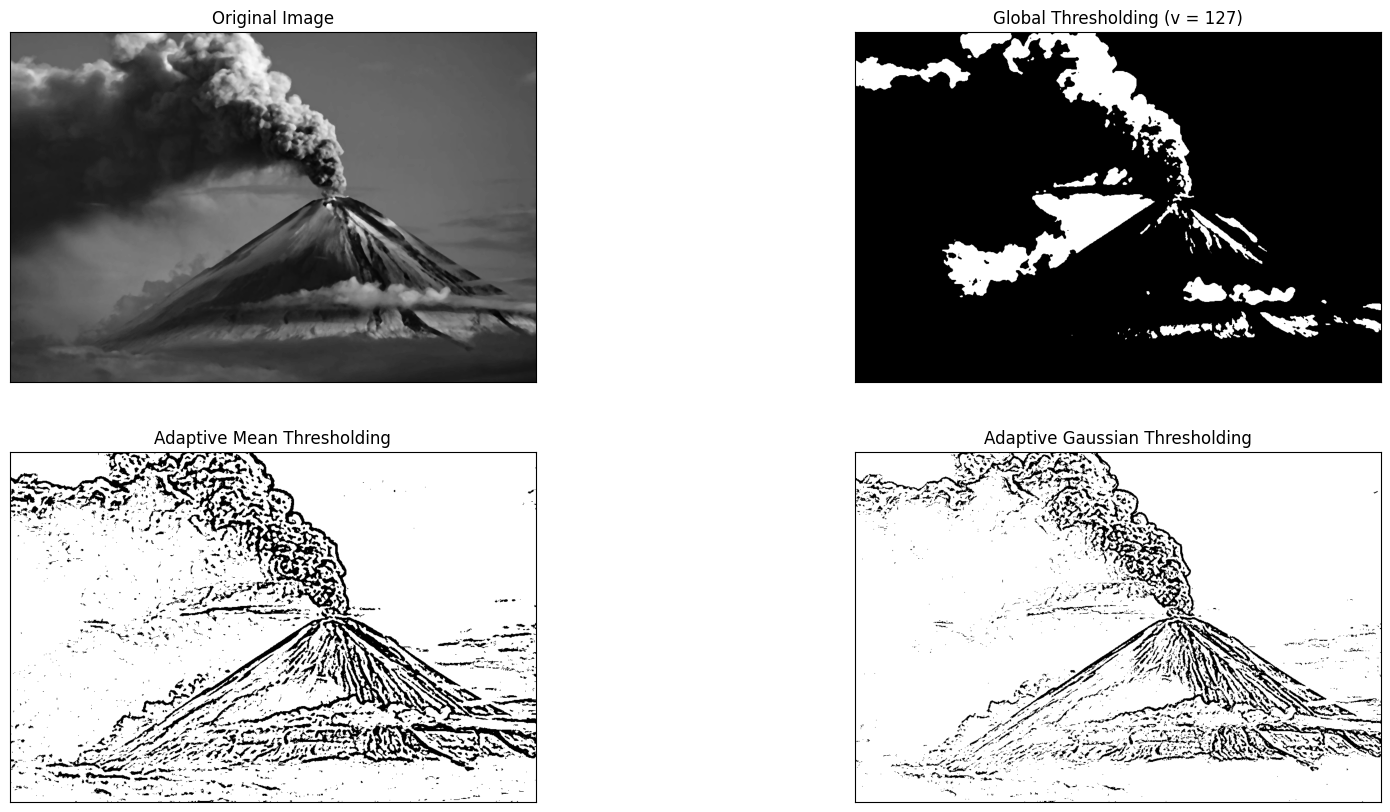

In [5]:
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

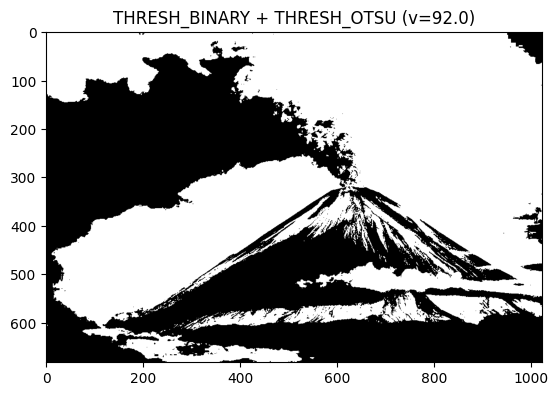

In [24]:
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.title(f"THRESH_BINARY + THRESH_OTSU (v={ret2})")
plt.imshow(th2,'gray')

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

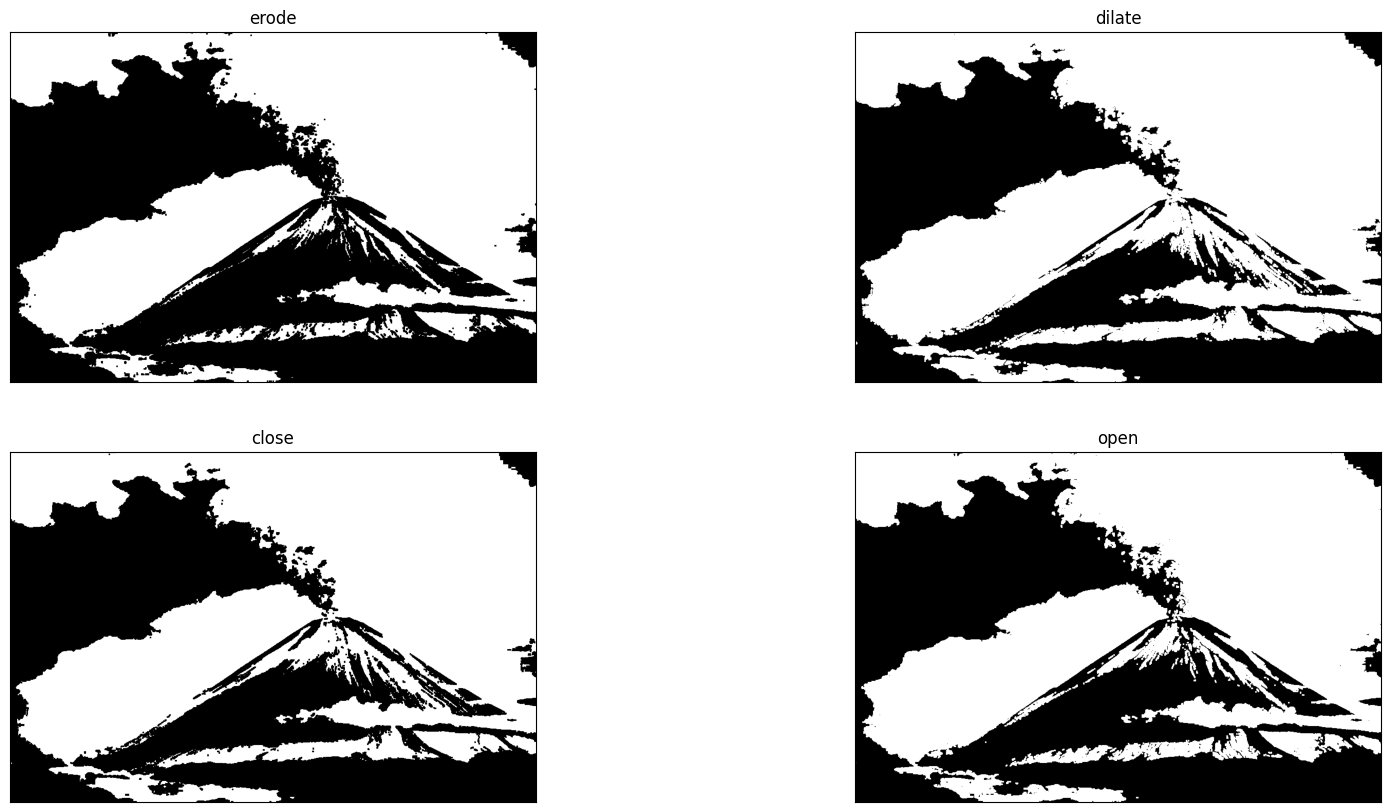

In [7]:
kernel = np.ones((3, 3), np.uint8)  
images = [cv2.erode(th2, kernel),
          cv2.dilate(th2, kernel),
          cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel),
          cv.morphologyEx(th2, cv.MORPH_OPEN, kernel)]

title = ['erode','dilate','close','open']
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

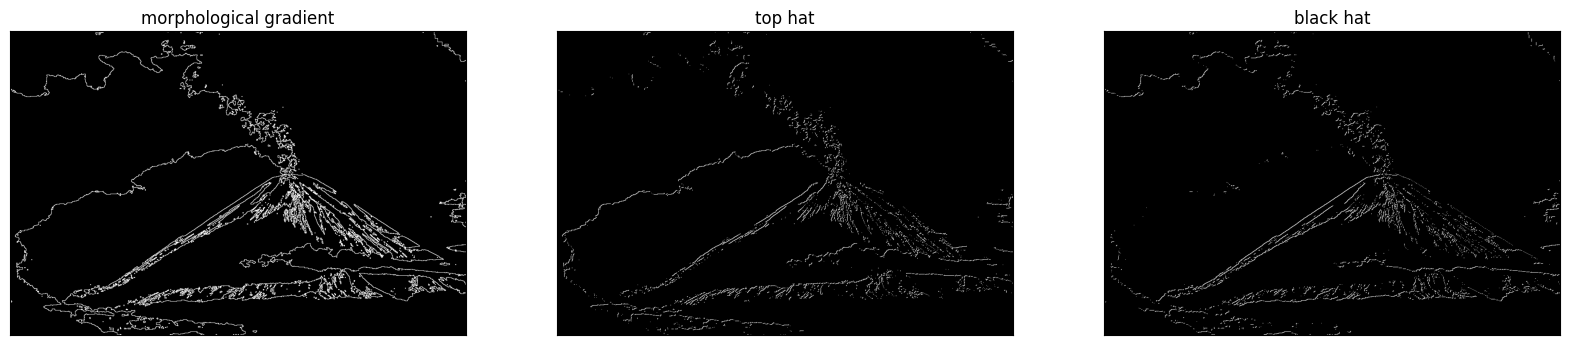

In [8]:
kernel = np.ones((2, 2), np.uint8)  
images = [cv.morphologyEx(th2, cv.MORPH_GRADIENT, kernel),
          cv.morphologyEx(th2, cv.MORPH_TOPHAT, kernel),
          cv.morphologyEx(th2, cv.MORPH_BLACKHAT, kernel)]

title = ['morphological gradient','top hat','black hat']
plt.figure(figsize=(20,5))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [42]:
def test_text_image(img_path):
    ksize = (2, 2)

    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"
    _, img = cv.threshold(img,160,255,cv.THRESH_BINARY)
    th1 = cv.morphologyEx(img, cv.MORPH_DILATE , cv.getStructuringElement(cv.MORPH_RECT, ksize))
    th2 = cv.morphologyEx(img, cv.MORPH_DILATE , cv.getStructuringElement(cv.MORPH_CROSS, ksize))
    th3 = cv.morphologyEx(img, cv.MORPH_DILATE , cv.getStructuringElement(cv.MORPH_ELLIPSE, ksize))

    titles = ['Binarized Image',
              'MORPH_RECT',
              'MORPH_CROSS',
              'MORPH_ELLIPSE']
    images = [img, th1, th2, th3]
    plt.figure(figsize=(20,20))
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

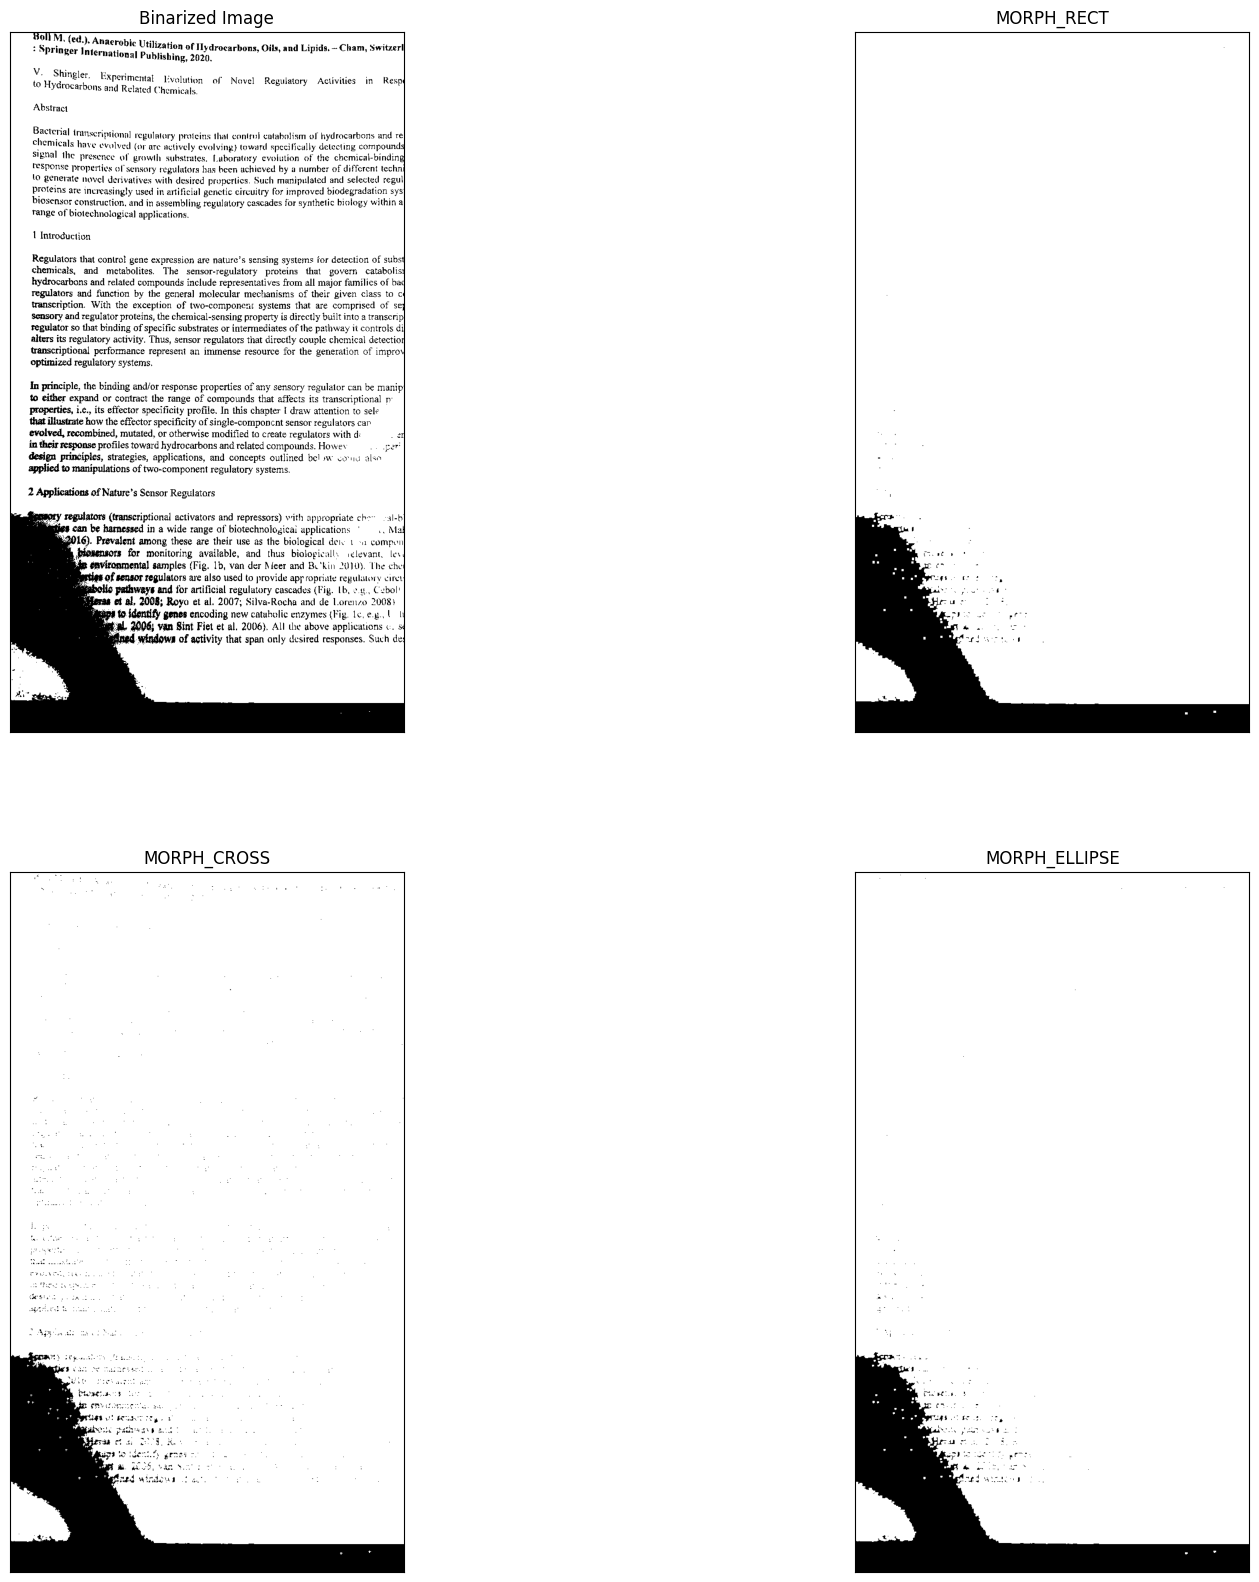

In [38]:
test_text_image('text_img.jpg')

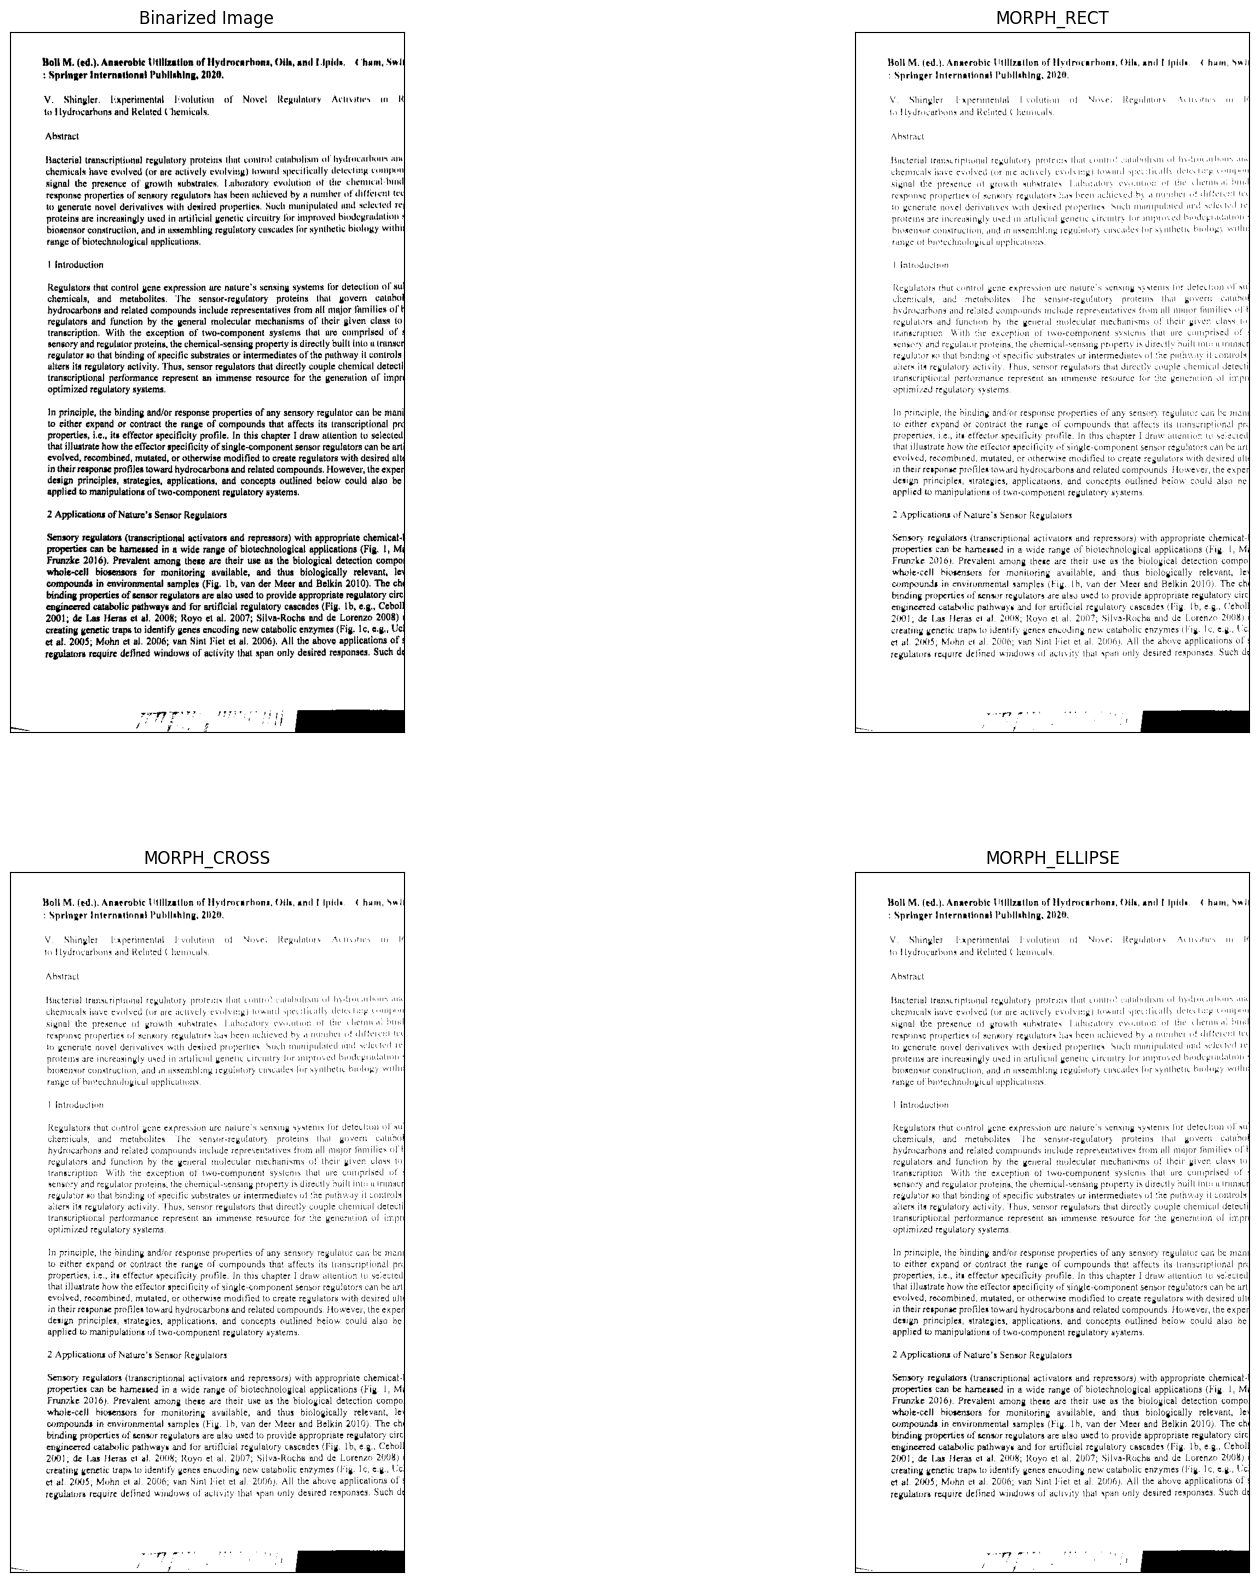

In [43]:
test_text_image('text_img_2.jpg')